# Build TAO model

In [1]:
import orsa
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)

print(orsa.__version__)

0.7.3


In [2]:
model = orsa.model.Model([], np.arange(0.5, 12, 0.005), 0.8, 11, orsa.oscillation.default(), orsa.detector.default(), False, True, True, rebin = 1, exposure = 1)

model.add_parameter(orsa.model.DetectorParameter(label = 'eff', value = 1,          error = 0.01,   prior = {'positive': None},   formatted_label = r'$\epsilon$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a',   value = 0.015,    error = 0.0077, prior = {'positive': None},   formatted_label = r'$a$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'b',   value = 0.001,   error = 0.,  prior = {'positive': None},   formatted_label = r'$b$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'c',   value = 0.001,    error = 0.,  prior = {'positive': None},   formatted_label = r'$c$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a0',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_0$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a1',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_1$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a2',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_2$'))
model.add_parameter(orsa.model.DetectorParameter(label = 'a3',  value = 0,          error = 1,      is_relative=False,            formatted_label = r'$a^{nl}_3$'))

model.add_parameter(orsa.model.OscillationParameter(label = 'rho',      value = 2.45,       error = 0.06,   prior = {'positive': None}, formatted_label = r'$\rho$'))
model.add_parameter(orsa.model.OscillationParameter(label = 'dm2_21',   value = 7.53e-5,    error = np.inf,                       formatted_label = r'$\Delta m^2_{21}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 'dm2_31',   value = 2.5283e-3,  error = np.inf,                       formatted_label = r'$\Delta m^2_{31}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 's2_12',    value = 0.307,      error = np.inf,                       formatted_label = r'$\sin^2 \theta_{12}$'))
model.add_parameter(orsa.model.OscillationParameter(label = 's2_13',    value = 0.0218,     error = np.inf,                       formatted_label = r'$\sin^2 \theta_{13}$'))

shape_fact = np.sqrt(36e-03/model.bin)
shape_fact_20 = np.sqrt(20e-03/model.bin)

gen_dict = dict()
gen_dict['rea'] = orsa.generator.reactor('HM_bump', True, True, shape_uncertainty='tao')
gen_dict['U'] = orsa.generator.geoneutrinos('238U', True, True, shape_uncertainty=0.05)
gen_dict['Th'] = orsa.generator.geoneutrinos('232Th', True, True, shape_uncertainty=0.05)
gen_dict['geo'] = orsa.generator.spe2gen(0.9*orsa.generator.geoneutrinos('238U', True, True).get_spectrum(model.E_eval) + 0.3*orsa.generator.geoneutrinos('232Th', True, True).get_spectrum(model.E_eval), shape_uncertainty=0.05)
gen_dict['lihe'] =  orsa.generator.sniper('lihe', True, shape_uncertainty=0.1)
gen_dict['acc'] =  orsa.generator.sniper('accidentals', True, shape_uncertainty=0)
gen_dict['fn'] = orsa.generator.common_inputs('FnBkgHistogramAD', orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.2)
gen_dict['alpha'] = orsa.generator.common_inputs('AlphaNBkgHistogramAD',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.5)
gen_dict['glob'] = orsa.generator.common_inputs('OtherReactorSpectrum_L300km',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.05)
gen_dict['atm'] = orsa.generator.common_inputs('AtmosphericNeutrinoModelGENIE2',  orsa.spectrum.ReconstructedSpectrum, True, shape_uncertainty=0.5) 
gen_dict['snf'] = orsa.generator.common_inputs('SNF_VisibleSpectrum',  orsa.spectrum.UnoscillatedSpectrum, True, shape_uncertainty=0)  
gen_dict['noneq'] = orsa.generator.common_inputs('NonEq_VisibleSpectrum',  orsa.spectrum.UnoscillatedSpectrum, True, shape_uncertainty=0)

model.add_parameter(orsa.model.CoreParameter(label = 'TS-C1', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{TS-C1}$', baseline = 0.030, power = 4.6))
model.add_parameter(orsa.model.CoreParameter(label = 'TS-C2', value = 1, error = 0.008, formatted_label = r'$R_\mathrm{TS-C2}$', baseline = 0.225, power = 4.6))

model.add_parameter(orsa.model.NormalizationParameter(label = 'rea',   value = 2000,    generator = gen_dict['rea'],     error = 0.1,     is_oscillated=True, has_duty=True,      formatted_label = r'$N_\mathrm{rea}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'U',     value = 0.,     generator = gen_dict['U'],       error = 0.,                                           formatted_label = r'$N_\mathrm{U}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'Th',    value = 0.,     generator = gen_dict['Th'],      error = 0.,                                           formatted_label = r'$N_\mathrm{Th}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'acc',   value = 155.,     generator = gen_dict['acc'],     error = 0.01,                                             formatted_label = r'$N_\mathrm{acc}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'lihe',  value = 54.,     generator = gen_dict['lihe'],    error = 0.2,                                              formatted_label = r'$N_\mathrm{Li/He}$'))
model.add_parameter(orsa.model.NormalizationParameter(label = 'fn',    value = 92.,     generator = gen_dict['fn'],      error = 1.,                                               formatted_label = r'$N_\mathrm{fn}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'alpha', value = 0.,    generator = gen_dict['alpha'],   error = 0.,                                              formatted_label = r'$N_\mathrm{\alpha}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'glob',  value = 0.,     generator = gen_dict['glob'],    error = 0.,                                             formatted_label = r'$N_\mathrm{glob}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'atm',   value = 0.,    generator = gen_dict['atm'],     error = 0.,                                              formatted_label = r'$N_\mathrm{atm}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'snf',   value = 0.,    generator = gen_dict['snf'],     error = 0.,      is_oscillated=True, has_duty=False,     formatted_label = r'$N_\mathrm{SNF}$'))
# model.add_parameter(orsa.model.NormalizationParameter(label = 'noneq', value = 0.,    generator = gen_dict['noneq'],   error = 0.,      is_oscillated=True, has_duty=True,      formatted_label = r'$N_\mathrm{noneq}$'))

model.exposure = 6*365.25

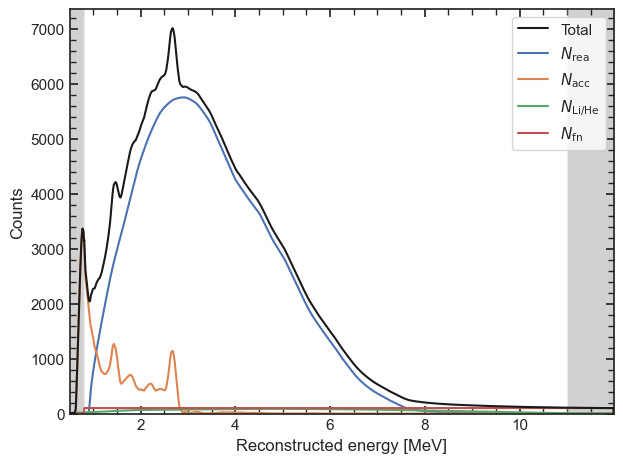

In [3]:
model # use model.to_json(filename) to store it to file

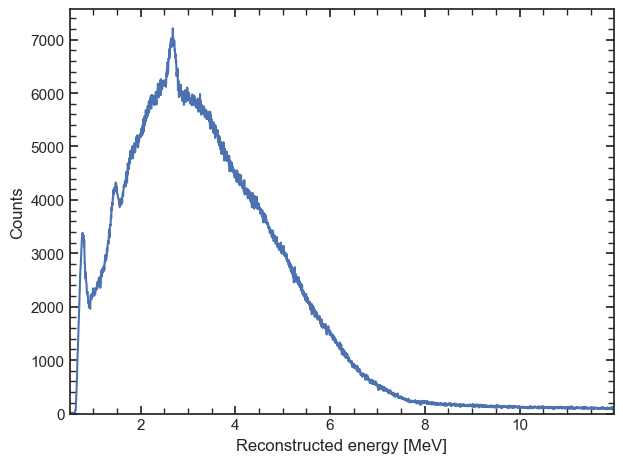

In [4]:
data = model.get_spectrum(asimov = False)
data

In [5]:
for param in model.oscillation_parameters:
    model.oscillation_parameters[param].fixed = True

for param in model.detector_parameters:
    model.detector_parameters[param].fixed = False

In [6]:
init_model = model.copy()
min_func_bin = orsa.probability.CostFunction(ll=orsa.probability.chi2, ll_args=dict(data=data), lp_args=model.get_priors())
model.use_shape_uncertainty = False
res = orsa.fit.minuit(model, min_func_bin)

Cost function parsed as chi2-like


In [7]:
res.obj

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2174                       │              Nfcn = 866              │
│ EDM = 0.0218 (Goal: 0.0002)      │           time = 14.6 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ eff   │  1.00024  │  0.00024  │            │            │         │         │       │
│ 1 │ a     │ 14.99e-3  │  0.05e-3  │            │            │         │         │       │
│ 2 │ a0    │   0.237   │   0.025   │            │            │         │         │       │
│ 3 │ a1    │  -0.015   │   0.017   │            │            │         │         │       │
│ 4 │ a2    │   0.00    │   0.05    │            │            │         │         │       │
│ 5 │ a3    │   -0.12   │   0.08    │            │            │         │         │       │
│ 6 │ TS-C1 │  1.00024  │  0.00024  │            │            │         │         │       │
│ 7 │ TS-C2 │  1.0000   │  0.0034   │            │            │         │         │       │
│ 8 │ rea   │ 4.0192e6  │ 0.0010e6  │            │            │         │         │       │
│ 9 │ acc   │ 338.52e3  │  0.34e3   │            │            │         │         │       │
│ 10│ lihe  │  118.8e3  │   0.5e3   │            │            │         │         │       │
│ 11│ fn    │ 201.37e3  │  0.33e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │          eff            a           a0           a1           a2           a3        TS-C1        TS-C2          rea          acc         lihe           fn │
├───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│   eff │     5.75e-08            0      0.03e-6      0.02e-6     -0.19e-6     -0.18e-6     -0.01e-6     -0.03e-6 -35.78710e-3  -2.66575e-3  -6.97164e-3  -1.73014e-3 │
│     a │            0     2.59e-09      -0.3e-9       3.1e-9       1.9e-9       3.6e-9            0           -0    4.8095e-6  -16.0189e-6  -14.8017e-6   -1.7163e-6 │
│    a0 │      0.03e-6      -0.3e-9     0.000621      0.39e-3       0.1e-3       0.1e-3      0.03e-6            0     123.4e-3    -278.6e-3     107.3e-3      -5.3e-3 │
│    a1 │      0.02e-6       3.1e-9      0.39e-3     0.000305     -0.07e-3      0.15e-3      0.03e-6           -0     22.20e-3   -258.25e-3    103.30e-3     38.08e-3 │
│    a2 │     -0.19e-6       1.9e-9       0.1e-3     -0.07e-3      0.00236      -0.0004     -0.19e-6    -0.001e-3      -0.7774       1.4171      -0.1845       0.0890 │
│    a3 │     -0.18e-6       3.6e-9       0.1e-3      0.15e-3      -0.0004      0.00635     -0.17e-6    -0.001e-3       -0.775        1.904       -1.303       -0.156 │
│ TS-C1 │     -0.01e-6            0      0.03e-6      0.03e-6     -0.19e-6     -0.17e-6     5.95e-08    